<a href="https://colab.research.google.com/github/Alaqeelbasil/traffic-analysis/blob/main/Weekly_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Weekly Project 2!

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Introduction to Road Traffic Accidents (RTA) Dataset

### Dataset Overview
The RTA Dataset provides a detailed snapshot of road traffic accidents, capturing a range of data from accident conditions to casualty details. This dataset is essential for analyzing patterns and causes of accidents to improve road safety.

### Data Characteristics
- **Entries**: The dataset contains 12,316 entries.
- **Features**: There are 32 features in the dataset, which include:
  - `Time`: Time when the accident occurred.
  - `Day_of_week`: Day of the week.
  - `Age_band_of_driver`: Age group of the driver involved.
  - `Sex_of_driver`: Gender of the driver.
  - `Educational_level`: Educational level of the driver.
  - `Type_of_vehicle`: Type of vehicle involved in the accident.
  - `Cause_of_accident`: Reported cause of the accident.
  - `Accident_severity`: Severity of the accident.
- **Target Column**: `Accident_severity` is used as the target column for modeling. This feature classifies the severity of each accident.

### Objective
Students will use this dataset to apply various data visualization, modeling, and evaluation techniques learned in class. The primary goal is to build models that can accurately predict the severity of accidents and to identify the key factors that contribute to severe accidents.

## Import Libraries
Import all the necessary libraries here. Include libraries for handling data (like pandas), visualization (like matplotlib and seaborn), and modeling (like scikit-learn).

In [216]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer
from sklearn.svm import LinearSVR
from sklearn.linear_model import LogisticRegression
import matplotlib as mpl
from sklearn.neighbors import KNeighborsClassifier



## Load Data
Load the dataset from the provided CSV file into a DataFrame.

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Tuwaiq/2 - Foundations of Machine Learning/5- Weekly Project/RTA_Dataset.csv')

## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [13]:
df.tail(30)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
12286,1900-01-01 20:51:00,Tuesday,18-30,Male,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,5,3,Driver,Normal,Not a Pedestrian,Moving Backward,Slight Injury
12287,1900-01-01 14:00:00,Saturday,31-50,Male,High school,Owner,2-5yr,Lorry (41?100Q),Owner,NaN,...,Other,NaN,NaN,NaN,NaN,Employee,Normal,Not a Pedestrian,Changing lane to the left,Slight Injury
12288,1900-01-01 14:00:00,Saturday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,Below 1yr,...,Other,NaN,NaN,NaN,NaN,NaN,Normal,Not a Pedestrian,No distancing,Serious Injury
12289,1900-01-01 14:43:00,Friday,Over 51,Male,Junior high school,Employee,1-2yr,Public (> 45 seats),Owner,2-5yrs,...,Going straight,Driver or rider,Male,18-30,3,NaN,NaN,Not a Pedestrian,No priority to vehicle,Slight Injury
12290,1900-01-01 16:26:00,Tuesday,Over 51,Male,Above high school,Owner,2-5yr,Public (12 seats),Owner,NaN,...,Reversing,NaN,NaN,NaN,NaN,NaN,NaN,Not a Pedestrian,Changing lane to the right,Slight Injury
12291,1900-01-01 16:26:00,Tuesday,Over 51,Male,NaN,NaN,NaN,Other,Owner,5-10yrs,...,Other,Driver or rider,Male,31-50,3,NaN,NaN,Not a Pedestrian,No distancing,Slight Injury
12292,1900-01-01 13:54:00,Saturday,31-50,Male,Elementary school,Owner,2-5yr,Public (12 seats),Owner,Unknown,...,Turnover,NaN,NaN,NaN,NaN,Self-employed,Normal,Not a Pedestrian,No distancing,Slight Injury
12293,1900-01-01 13:54:00,Saturday,31-50,Male,Junior high school,Employee,1-2yr,Other,Owner,NaN,...,Going straight,Driver or rider,Male,5,3,Driver,Normal,Not a Pedestrian,Getting off the vehicle improperly,Slight Injury
12294,1900-01-01 13:54:00,Saturday,18-30,Male,NaN,Owner,5-10yr,Public (12 seats),Owner,1-2yr,...,Going straight,NaN,NaN,NaN,NaN,NaN,NaN,Not a Pedestrian,No priority to pedestrian,Slight Injury
12295,1900-01-01 15:31:00,Monday,31-50,Male,Junior high school,Employee,Below 1yr,Stationwagen,Owner,Above 10yr,...,Going straight,Driver or rider,Male,18-30,2,NaN,NaN,Not a Pedestrian,Changing lane to the left,Slight Injury


In [130]:
df.isna().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,0
Vehicle_driver_relation,0
Driving_experience,0
Type_of_vehicle,0
Owner_of_vehicle,0
Service_year_of_vehicle,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

## Data Preprocessing
Data preprocessing is essential for transforming raw data into a format suitable for further analysis and modeling. Follow these steps to ensure your data is ready for predictive modeling or advanced analytics:
- **Handling Missing Values**: Replace missing values with appropriate statistics (mean, median, mode) or use more complex imputation techniques.
- **Normalization/Scaling**: Scale data to a small, specified range like 0 to 1, or transform it to have a mean of zero and a standard deviation of one.
- **Label Encoding**: Convert categorical text data into model-understandable numbers where the labels are ordered.
- **One-Hot Encoding**: Use for nominal categorical data where no ordinal relationship exists to transform the data into a binary column for each category. (Be careful not to increase the dimensionality significantly)
- **Detection and Treatment of Outliers**: Use statistical tests, box plots, or scatter plots to identify outliers and then cap, trim, or use robust methods to reduce the effect of outliers, depending on the context.
- **Feature Engineering**: Enhance your dataset by creating new features and transforming existing ones. This might involve combining data from different columns, applying transformations, or reducing dimensionality with techniques like PCA to improve model performance.

Consider these steps as a foundation, and feel free to introduce additional preprocessing techniques as needed to address specific characteristics of your dataset.

In [180]:
df['Time'] = pd.to_datetime(df['Time'], format='%Y%m%d% H:%M:%S')

In [181]:
df['Casualty_class'] = df['Casualty_class'].replace('na', np.nan)
df['Sex_of_casualty'] = df['Sex_of_casualty'].replace('na', np.nan)
df['Age_band_of_casualty'] = df['Age_band_of_casualty'].replace('na', np.nan)
df['Casualty_severity'] = df['Casualty_severity'].replace('na', np.nan)
df['Type_of_vehicle'] = df['Type_of_vehicle'].replace('nan', np.nan)



In [182]:
df['Type_of_vehicle'] = df['Type_of_vehicle'].apply(lambda x: str(x).replace('Lorry (41?100Q)', 'Lorry'))
df['Type_of_vehicle'] = df['Type_of_vehicle'].apply(lambda x: str(x).replace('Lorry (11?40Q)', 'Lorry'))
df['Type_of_vehicle'] = df['Type_of_vehicle'].apply(lambda x: str(x).replace('Public (13?45 seats)', 'Public, 13-45 seats'))
df['Type_of_vehicle'] = df['Type_of_vehicle'].apply(lambda x: str(x).replace('Pick up upto 10Q', 'Pick up'))
df['Type_of_vehicle'] = df['Type_of_vehicle'].apply(lambda x: str(x).replace('Public (12 seats)', 'Public'))



In [71]:
df['Educational_level'].value_counts()

,count
Educational_level,
Junior high school,4468
Elementary school,1266
High school,678
Above high school,239
Writing & reading,105
Unknown,58
Illiterate,24


In [183]:
df.dropna(subset = ['Casualty_severity'], inplace =  True)
df.dropna(subset = ['Type_of_vehicle'], inplace =  True)

In [184]:
df.head(10)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
3,1900-01-01 01:06:00,Sunday,18-30,Male,Unknown,Employee,5-10yr,Public (> 45 seats),Governmental,5,...,Going straight,Pedestrian,Female,0,3,Driver,Normal,Not a Pedestrian,1,Slight Injury
8,1900-01-01 17:20:00,Friday,18-30,Male,1-2yr,Employee,Above 10yr,Lorry,Owner,0,...,Going straight,Pedestrian,Male,4,3,Driver,Normal,Crossing from driver's nearside,1,Slight Injury
9,1900-01-01 17:20:00,Friday,18-30,Male,2-5yrs,Employee,1-2yr,Automobile,Owner,1,...,U-Turn,Passenger,Male,0,3,Driver,Normal,Not a Pedestrian,9,Serious Injury
11,1900-01-01 14:40:00,Saturday,31-50,Male,Unknown,Employee,No Licence,Automobile,Owner,5,...,Going straight,Driver or rider,Male,0,3,Driver,Normal,Not a Pedestrian,11,Serious Injury
14,1900-01-01 17:45:00,Thursday,31-50,Male,1-2yr,Employee,Above 10yr,Automobile,Owner,0,...,Going straight,Driver or rider,Female,0,3,Driver,Normal,Not a Pedestrian,10,Serious Injury
19,1900-01-01 08:20:00,Tuesday,18-30,Male,5-10yrs,Employee,Below 1yr,Long lorry,Owner,2,...,Going straight,Driver or rider,Male,4,3,Driver,Normal,Not a Pedestrian,9,Serious Injury
21,1900-01-01 15:10:00,Thursday,18-30,Male,5-10yrs,Employee,2-5yr,Lorry,Owner,2,...,Moving Backward,Driver or rider,Male,0,3,Driver,Normal,Not a Pedestrian,16,Serious Injury
22,1900-01-01 12:11:00,Thursday,18-30,Male,Unknown,Employee,5-10yr,Lorry,Owner,5,...,Getting off,Passenger,Female,1,3,Driver,Normal,Not a Pedestrian,14,Serious Injury
23,1900-01-01 12:11:00,Thursday,31-50,Male,Unknown,Employee,Above 10yr,Public,Owner,5,...,Reversing,Passenger,Male,0,3,Employee,Normal,Not a Pedestrian,1,Serious Injury
25,1900-01-01 18:36:00,Wednesday,18-30,Male,Above 10yr,Employee,2-5yr,Taxi,Owner,3,...,Going straight,Driver or rider,Female,1,3,Self-employed,Normal,Not a Pedestrian,13,Slight Injury


In [74]:
df['Work_of_casuality'] = df['Work_of_casuality'].fillna('Unknown')
df['Fitness_of_casuality'] = df['Fitness_of_casuality'].fillna('Other')
df['Type_of_collision'] = df['Type_of_collision'].fillna('Other')
df['Vehicle_movement'] = df['Vehicle_movement'].fillna('Unknown')
df['Type_of_collision'] = df['Type_of_collision'].fillna('Unknown')
df['Service_year_of_vehicle'] = df['Service_year_of_vehicle'].fillna('Unknown')
df['Educational_level'] = df['Service_year_of_vehicle'].fillna('Unknown')



In [177]:
df['Casualty_severity'].value_counts()
#here i try evrey featuer to see the values and fill with the best one

,count
Casualty_severity,
3,5134
2,555
1,23


In [178]:
df['Casualty_severity'] = df['Casualty_severity'].astype(int)

In [59]:
df['Defect_of_vehicle'] = df['Defect_of_vehicle'].replace('No defect', np.nan)
df['Defect_of_vehicle'] = df['Defect_of_vehicle'].fillna(0)
df['Defect_of_vehicle'] = df['Defect_of_vehicle'].astype(int)

<class 'pandas.core.series.Series'>
Index: 7873 entries, 2 to 12315
Series name: Defect_of_vehicle
Non-Null Count  Dtype
--------------  -----
7873 non-null   int64
dtypes: int64(1)
memory usage: 123.0 KB


In [76]:
df.isna().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,0
Vehicle_driver_relation,311
Driving_experience,456
Type_of_vehicle,0
Owner_of_vehicle,240
Service_year_of_vehicle,0


In [78]:
df.dropna(subset = ['Types_of_Junction'], inplace =  True)
df.dropna(subset = ['Road_surface_type'], inplace =  True)
df.dropna(subset = ['Lanes_or_Medians'], inplace =  True)
df.dropna(subset = ['Road_allignment'], inplace =  True)
df.dropna(subset = ['Area_accident_occured'], inplace =  True)
df.dropna(subset = ['Owner_of_vehicle'], inplace =  True)
df.dropna(subset = ['Driving_experience'], inplace =  True)
df.dropna(subset = ['Vehicle_driver_relation'], inplace =  True)

In [79]:
df.isna().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,0
Vehicle_driver_relation,0
Driving_experience,0
Type_of_vehicle,0
Owner_of_vehicle,0
Service_year_of_vehicle,0


In [196]:
df.describe()

,Time,Service_year_of_vehicle,Defect_of_vehicle,Number_of_vehicles_involved,Number_of_casualties,Age_band_of_casualty,Casualty_severity,Cause_of_accident
count,5712,5712.000000,5712.000000,5712.000000,5712.000000,5712.000000,5712.000000,5712.000000
mean,1900-01-01 14:16:21.680672,3.459909,0.056548,2.038165,1.557073,1.296569,2.894783,6.900735
min,1900-01-01 00:01:00,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,1900-01-01 10:30:00,2.000000,0.000000,2.000000,1.000000,0.000000,3.000000,1.000000
50%,1900-01-01 15:06:00,5.000000,0.000000,2.000000,1.000000,1.000000,3.000000,9.000000
75%,1900-01-01 18:08:00,5.000000,0.000000,2.000000,2.000000,3.000000,3.000000,11.000000
max,1900-01-01 23:59:00,5.000000,7.000000,7.000000,8.000000,4.000000,3.000000,19.000000
std,NaN,1.810436,0.602443,0.673130,1.026304,1.440807,0.319715,5.107781


## Data Visualization
Create various plots to visualize the relationships in the data. Consider using the following to show different aspects of the data:

* Heatmap of Correlation Matrix.
* Line plots.
* Scatter plots.
* Histograms.
* Boxplots.

Use more if needed!

In [206]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

categorical_features = [
    'Weather_conditions',
    'Number_of_vehicles_involved',
    'Vehicle_movement',
    'Pedestrian_movement',
    'Road_allignment',
    'Driving_experience',
    'Time']
X_categorical = df[categorical_features]
X_encoded = encoder.fit_transform(X_categorical)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [207]:
le = LabelEncoder()
df['Cause_of_accident'] = le.fit_transform(df['Cause_of_accident'])
df['Service_year_of_vehicle'] = le.fit_transform(df['Service_year_of_vehicle'])



In [139]:
df['Cause_of_accident'].value_counts()

,count
Cause_of_accident,
10,1042
1,833
3,693
0,684
9,546
12,539
11,336
13,202
16,199


<function matplotlib.pyplot.show(close=None, block=None)>

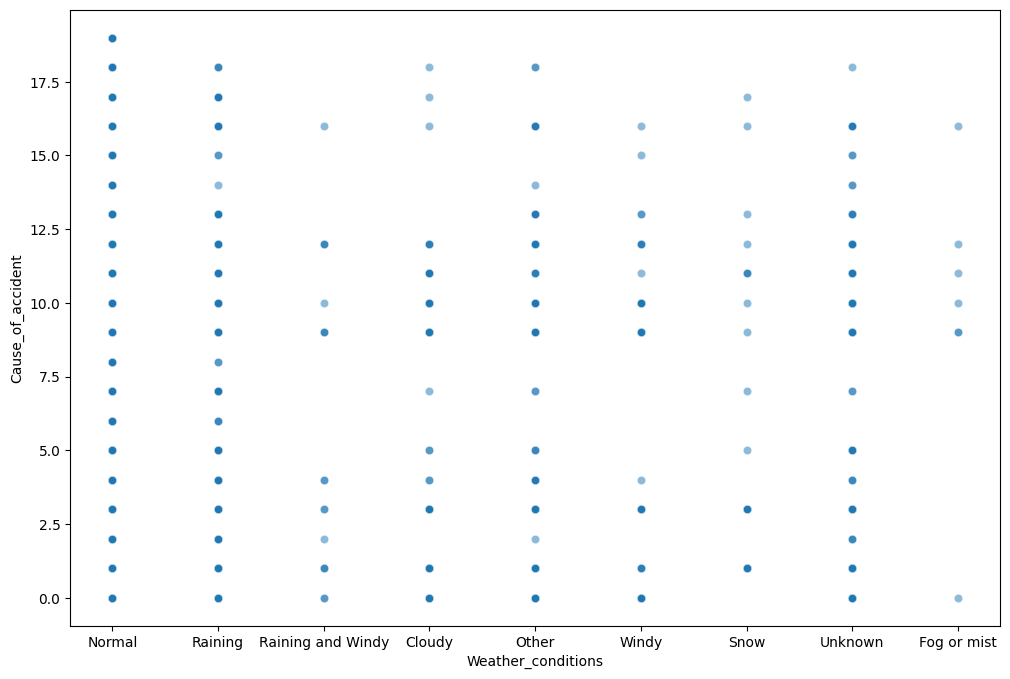

In [190]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df,y='Cause_of_accident',x="Weather_conditions",alpha=0.5)
plt.show

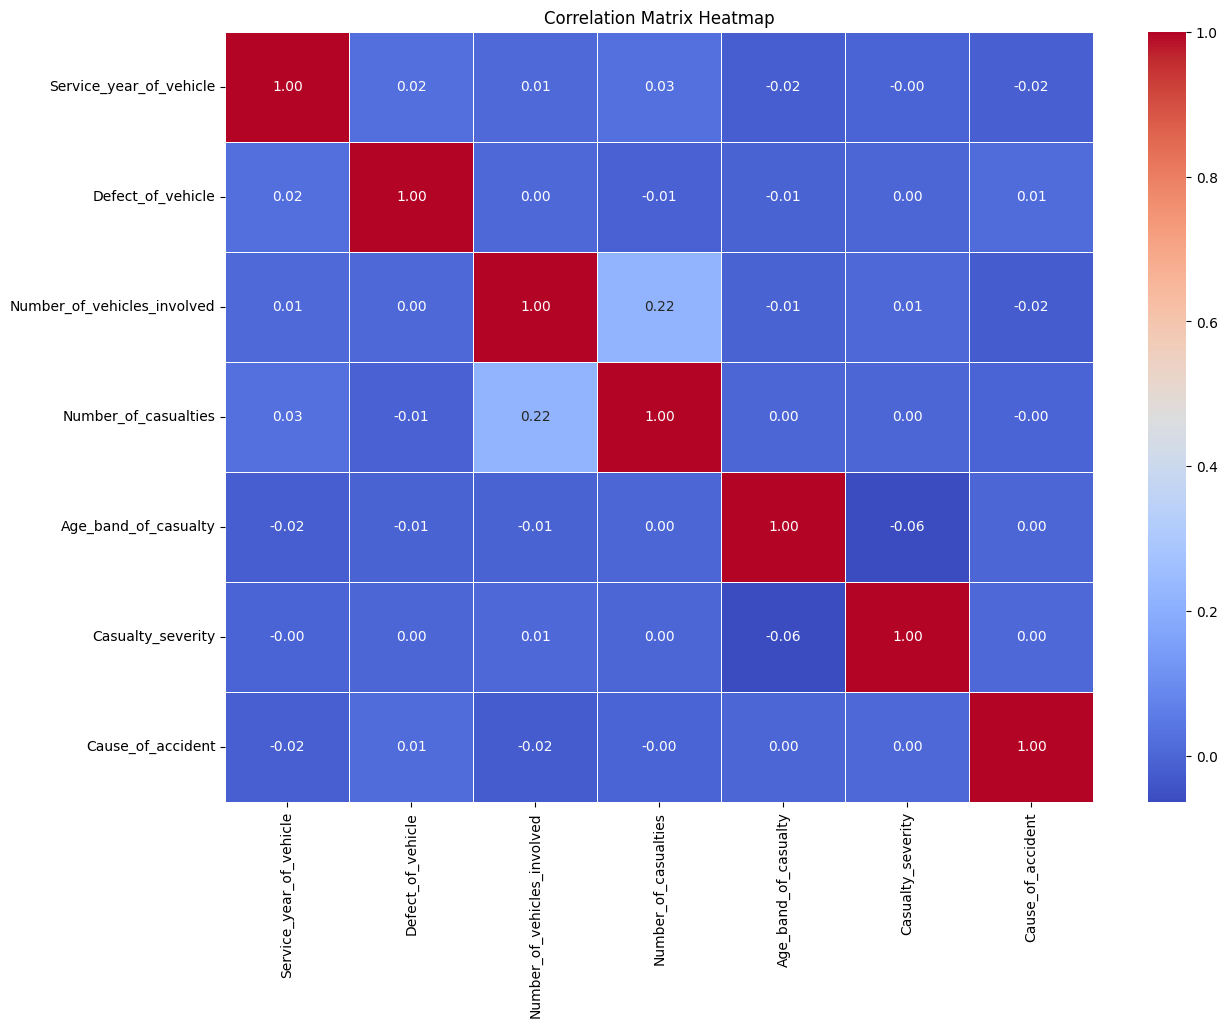

In [209]:
numerical_features = df.select_dtypes(include=['number']).columns
correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

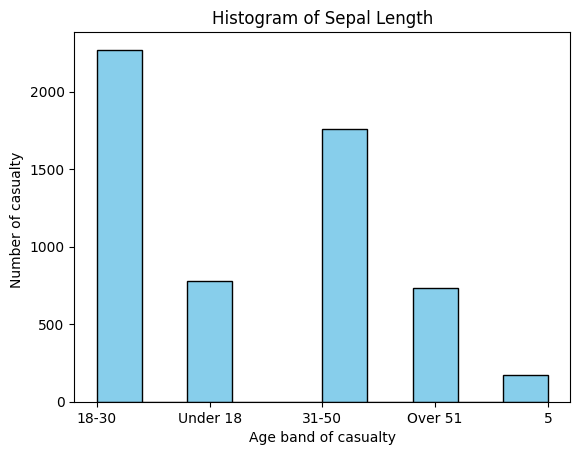

In [101]:
plt.hist(
df['Age_band_of_casualty'],bins=10, color='skyblue', edgecolor='black')

plt.xlabel('Age band of casualty')
plt.ylabel('Number of casualty')
plt.title('Histogram of Sepal Length')
plt.show()

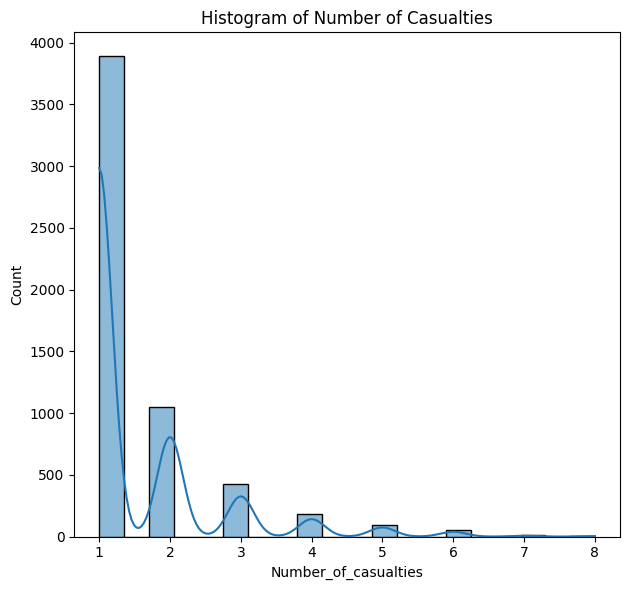

In [211]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Number_of_casualties'], bins=20, kde=True)
plt.title('Histogram of Number of Casualties')

plt.tight_layout()
plt.show()


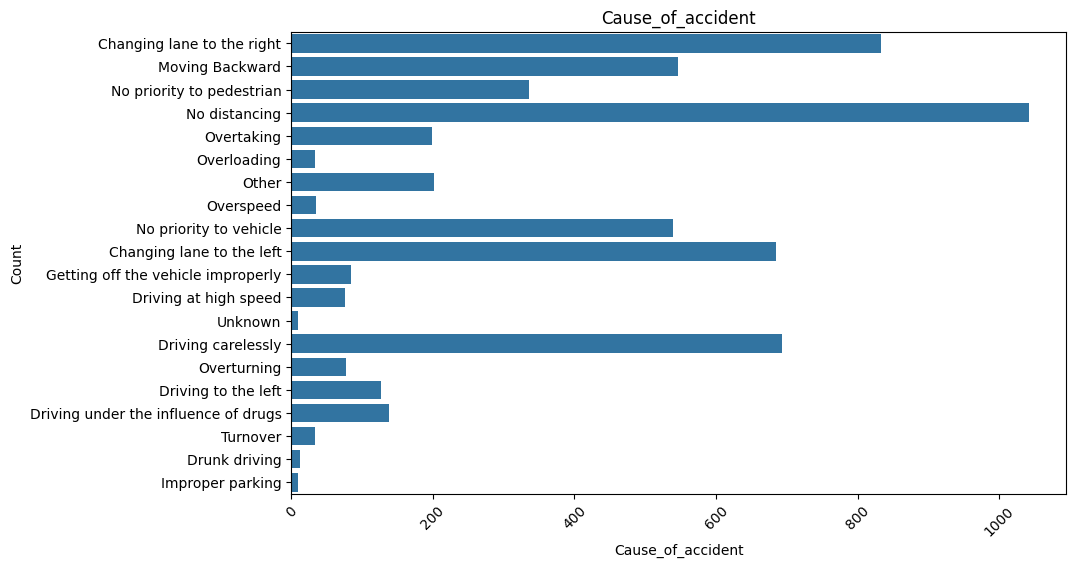

In [95]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Cause_of_accident', data=df)
plt.title('Cause_of_accident')
plt.xlabel('Cause_of_accident')
plt.ylabel('Count')
plt.show()

In [ ]:
# most of accdients are beacuse of having no distance between cars
# imporoper parking is the lowest cause

## Feature Selection
- Choose features that you believe will most influence the outcome based on your analysis and the insights from your visualizations. Focus on those that appear most impactful to include in your modeling.

## Train-Test Split
* Divide the dataset into training and testing sets to evaluate the performance of your models.

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5712 entries, 3 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Time                         5712 non-null   datetime64[ns]
 1   Day_of_week                  5712 non-null   object        
 2   Age_band_of_driver           5712 non-null   object        
 3   Sex_of_driver                5712 non-null   object        
 4   Educational_level            5712 non-null   object        
 5   Vehicle_driver_relation      5712 non-null   object        
 6   Driving_experience           5712 non-null   object        
 7   Type_of_vehicle              5712 non-null   object        
 8   Owner_of_vehicle             5712 non-null   object        
 9   Service_year_of_vehicle      5712 non-null   int64         
 10  Defect_of_vehicle            5712 non-null   int64         
 11  Area_accident_occured        5712 non-null   ob

In [200]:
target = 'Cause_of_accident'
features = [ 'Weather_conditions', 'Number_of_vehicles_involved', 'Vehicle_movement',
'Pedestrian_movement', 'Road_allignment','Driving_experience','Time']
X = df[features]
y = df[target]

In [212]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print(f"Train size: {X_train.shape}")
print(f"Test size: {X_test.shape}")

Train size: (4569, 7)
Test size: (1143, 7)


In [201]:
X_train = X_train.replace('Unknown', np.nan)
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()
for col in categorical_features:
    X_train[col] = X_train[col].astype(str)

numerical_features = X_train.select_dtypes(include=[np.number]).columns.tolist()
numerical_transformer = SimpleImputer(strategy='constant', fill_value=0)
categorical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='constant', fill_value='missing')),('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(transformers=[('number', numerical_transformer, numerical_features), ('catogrey', categorical_transformer, categorical_features) ])

pipeline = Pipeline(steps=[('preprocessor', preprocessor),('model', DecisionTreeClassifier(random_state=42))])
pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('number',
                                                  SimpleImputer(fill_value=0,
                                                                strategy='constant'),
                                                  ['Number_of_vehicles_involved']),
                                                 ('catogrey',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Weather_conditions',
                                                   'Vehicle_movement',
                                                   'Pedestrian_movement',
                                                   'Road_allignment',
                                                   'Driving_experience'])])),
                ('model', DecisionTreeClassifier(random_state=42))])

## Modeling

Once the data is split into training and testing sets, the next step is to build models to make predictions. Here, we will explore several machine learning algorithms, each with its unique characteristics and suitability for different types of data and problems. You will implement the following models:

### 1. Logistic Regression

### 2. Decision Tree Classifier

### 3. Support Vector Machine (SVM)

### 4. K-Neighbors Classifier

### Implementing the Models
- For each model, use the training data you have prepared to train the model.

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
log_reg = LogisticRegression(solver="lbfgs", random_state=42)
log_reg.fit(X, y)
log_reg = LogisticRegression(max_iter=50, random_state=42)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

#### Decision Tree Classifier

In [ ]:
tree_clf = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clf.fit(X, y)

#### Support Vector Machine (SVM)

In [ ]:
svm_reg = LinearSVR(epsilon=1.5, random_state=42)
svm_reg.fit(X, y)

#### K-Neighbors Classifier

In [ ]:
knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_test, y_train)
knn_y_pred_prob = knn_clf.predict_proba(X_test)
knn_y_pred = knn_clf.predict(X_test)

## Model Evaluation

After training your models, it's crucial to evaluate their performance to understand their effectiveness and limitations. This section outlines various techniques and metrics to assess the performance of each model you have implemented.

### Evaluation Techniques
1. **Confusion Matrix**

2. **Accuracy**

3. **Precision and Recall**

4. **F1 Score**

5. **ROC Curve and AUC**

### Implementing Evaluation
- Calculate the metrics listed above using your test data.

In [ ]:
y_test_binarized = label_binarize(y_test, classes=[1, 2, 3])
y_pred_binarized = label_binarize(y_pred, classes=[1, 2, 3])

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(y_test_binarized.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_binarized[:, i])
    roc_auc[i] = roc_auc_score(y_test_binarized[:, i], y_pred_binarized[:, i])
plt.figure()
colors = ('blue', 'red', 'green')
for i, color in zip(range(y_test_binarized.shape[1]), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5712 entries, 3 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Time                         5712 non-null   datetime64[ns]
 1   Day_of_week                  5712 non-null   object        
 2   Age_band_of_driver           5712 non-null   object        
 3   Sex_of_driver                5712 non-null   object        
 4   Educational_level            5712 non-null   object        
 5   Vehicle_driver_relation      5712 non-null   object        
 6   Driving_experience           5712 non-null   object        
 7   Type_of_vehicle              5712 non-null   object        
 8   Owner_of_vehicle             5712 non-null   object        
 9   Service_year_of_vehicle      5712 non-null   int64         
 10  Defect_of_vehicle            5712 non-null   int64         
 11  Area_accident_occured        5712 non-null   ob

## Project Questions:

### Comparative Analysis

- **Compare Metrics**: Examine the performance metrics (such as accuracy, precision, and recall) of each model. Document your observations on which model performs best for your dataset and the problem you're addressing.
- **Evaluate Trade-offs**: Discuss the trade-offs you encountered when choosing between models. Consider factors like computational efficiency, ease of implementation, and model interpretability.
- **Justify Your Choice**: After comparing and evaluating, explain why you believe one model is the best choice. Provide a clear rationale based on the performance metrics and trade-offs discussed.
- **Feature Importance**: Identify and discuss the most important features for the best-performing model. How do these features impact the predictions? Use the visualizations you have created to justify your answer if necessary.
- **Model Limitations**: Discuss any limitations you encountered with the models you used. Are there any aspects of the data or the problem that these models do not handle well?
- **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. This could include trying different algorithms, feature engineering techniques, or tuning hyperparameters.

### Answer Here: